In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.columns

Index(['id', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide.metformin', 'glipizide.metformin',
       'glimepiride.pioglitazone', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
drop_columns = ["id","encounter_id","patient_nbr","race","admission_type_id","discharge_disposition_id",
                "admission_source_id","payer_code","num_lab_procedures","num_procedures","num_medications",
               "number_outpatient","number_emergency","number_inpatient","max_glu_serum","A1Cresult","readmitted"]
df.drop(columns = drop_columns, axis=1, inplace=True)

In [5]:
df

,gender,age,weight,time_in_hospital,medical_specialty,diag_1,diag_2,diag_3,number_diagnoses,metformin,...,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
0,Female,[0-10),?,1,Pediatrics-Endocrinology,250.83,?,?,1,No,...,No,No,No,No,No,No,No,No,No,No
1,Female,[10-20),?,3,?,276,250.01,255,9,No,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,Female,[20-30),?,2,?,648,250,V27,6,No,...,No,No,No,No,No,No,No,No,No,Yes
3,Male,[30-40),?,2,?,8,250.43,403,7,No,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Male,[40-50),?,1,?,197,157,250,5,No,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,Male,[70-80),?,3,?,250.13,291,458,9,Steady,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,Female,[80-90),?,5,?,560,276,787,9,No,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Male,[70-80),?,1,?,38,590,296,13,Steady,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Female,[80-90),?,10,Surgery-General,996,285,998,9,No,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [6]:
for column in df.columns:
    print("--"*30,column,"--"*30)
    print(df[column].unique())

------------------------------------------------------------ gender ------------------------------------------------------------
['Female' 'Male' 'Unknown/Invalid']
------------------------------------------------------------ age ------------------------------------------------------------
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
------------------------------------------------------------ weight ------------------------------------------------------------
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
------------------------------------------------------------ time_in_hospital ------------------------------------------------------------
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
------------------------------------------------------------ medical_specialty ------------------------------------------------------------
['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 

['No' 'Steady']
------------------------------------------------------------ glipizide ------------------------------------------------------------
['No' 'Steady' 'Up' 'Down']
------------------------------------------------------------ glyburide ------------------------------------------------------------
['No' 'Steady' 'Up' 'Down']
------------------------------------------------------------ tolbutamide ------------------------------------------------------------
['No' 'Steady']
------------------------------------------------------------ pioglitazone ------------------------------------------------------------
['No' 'Steady' 'Up' 'Down']
------------------------------------------------------------ rosiglitazone ------------------------------------------------------------
['No' 'Steady' 'Up' 'Down']
------------------------------------------------------------ acarbose ------------------------------------------------------------
['No' 'Steady' 'Up' 'Down']
----------------------------

In [7]:
df["gender"] = df["gender"].replace("Unknown/Invalid","Others")

In [8]:
df["gender"].unique()

array(['Female', 'Male', 'Others'], dtype=object)

In [9]:
for column in df.columns:
    df[column] = df[column].replace("?",np.nan)

In [10]:
df

,gender,age,weight,time_in_hospital,medical_specialty,diag_1,diag_2,diag_3,number_diagnoses,metformin,...,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
0,Female,[0-10),NaN,1,Pediatrics-Endocrinology,250.83,NaN,NaN,1,No,...,No,No,No,No,No,No,No,No,No,No
1,Female,[10-20),NaN,3,NaN,276,250.01,255,9,No,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,Female,[20-30),NaN,2,NaN,648,250,V27,6,No,...,No,No,No,No,No,No,No,No,No,Yes
3,Male,[30-40),NaN,2,NaN,8,250.43,403,7,No,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Male,[40-50),NaN,1,NaN,197,157,250,5,No,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,Male,[70-80),NaN,3,NaN,250.13,291,458,9,Steady,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,Female,[80-90),NaN,5,NaN,560,276,787,9,No,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Male,[70-80),NaN,1,NaN,38,590,296,13,Steady,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Female,[80-90),NaN,10,Surgery-General,996,285,998,9,No,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [11]:
df.isnull().sum()

gender                          0
age                             0
weight                      98569
time_in_hospital                0
medical_specialty           49949
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
examide                         0
citoglipton                     0
insulin                         0
glyburide.metformin             0
glipizide.metformin             0
glimepiride.pi

In [12]:
Total_percantage_null_values = df.isnull().sum()/df.shape[0]
Total_percantage_null_values

gender                      0.000000
age                         0.000000
weight                      0.968585
time_in_hospital            0.000000
medical_specialty           0.490822
diag_1                      0.000206
diag_2                      0.003518
diag_3                      0.013983
number_diagnoses            0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
acetohexamide               0.000000
glipizide                   0.000000
glyburide                   0.000000
tolbutamide                 0.000000
pioglitazone                0.000000
rosiglitazone               0.000000
acarbose                    0.000000
miglitol                    0.000000
troglitazone                0.000000
tolazamide                  0.000000
examide                     0.000000
citoglipton                 0.000000
insulin                     0.000000
g

In [13]:
Total_percantage_null_values.nlargest(5)

weight               0.968585
medical_specialty    0.490822
diag_3               0.013983
diag_2               0.003518
diag_1               0.000206
dtype: float64

<AxesSubplot:>

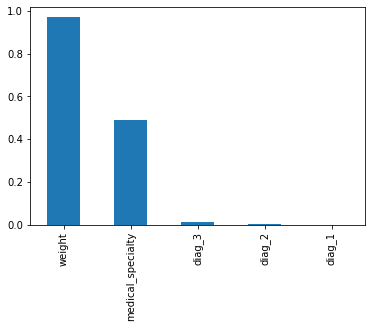

In [14]:
Total_percantage_null_values.nlargest(5).plot(kind="bar")

In [15]:
df.dropna(axis=0,how="any",inplace=True)

In [16]:
df_c= df

In [17]:
for column in df_c.columns:
    print("********",column,"******")
    print(df_c[column].unique())

******** gender ******
['Male' 'Female']
******** age ******
['[50-60)' '[60-70)' '[70-80)' '[80-90)' '[40-50)' '[30-40)' '[90-100)'
 '[10-20)' '[20-30)' '[0-10)']
******** weight ******
['[75-100)' '[0-25)' '[50-75)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)']
******** time_in_hospital ******
[ 2  5 11  9  6  7  3  1  8 12 10  4 13 14]
******** medical_specialty ******
['Cardiology' 'InternalMedicine' 'Surgery-General'
 'Family/GeneralPractice' 'ObstetricsandGynecology' 'Pediatrics'
 'Psychiatry' 'Dentistry']
******** diag_1 ******
['786' '414' '410' '562' '428' '276' '455' '530' '892' '458' '456' '435'
 'V58' '250.6' '578' '599' '250.83' '592' '432' '780' '491' '427' '447'
 '553' '996' '402' '715' '440' '250.8' '434' '304' '733' '621' '572' '729'
 '584' '682' '436' '451' '411' '250.4' '574' '486' '404' '79' '453' '998'
 '531' '441' '250.7' '577' '250.11' '283' '799' '185' '5' '721' '724'
 '433' '38' '654' '157' '557' '537' '714' '824' '532' '198' '560' '642'
 '444' '4

In [18]:
df.isnull().sum()

gender                      0
age                         0
weight                      0
time_in_hospital            0
medical_specialty           0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide.metformin         0
glipizide.metformin         0
glimepiride.pioglitazone    0
metformin.rosiglitazone     0
metformin.pioglitazone      0
change                      0
diabetesMe

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype == "O":
        df[col]= le.fit_transform(df[col])

In [21]:
df

,gender,age,weight,time_in_hospital,medical_specialty,diag_1,diag_2,diag_3,number_diagnoses,metformin,...,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
1102,1,5,7,2,0,210,24,73,6,1,...,0,0,2,0,0,0,0,0,1,1
1132,0,6,0,5,0,89,219,41,7,2,...,0,0,2,0,0,0,0,0,0,1
1190,0,7,7,11,3,86,87,50,7,1,...,0,0,2,0,0,0,0,0,0,1
1204,0,8,6,9,0,89,87,30,7,1,...,0,0,2,0,0,0,0,0,0,1
1214,0,5,7,6,7,150,46,38,7,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101238,1,7,7,1,3,164,76,92,9,1,...,0,0,2,0,0,0,0,0,1,1
101330,1,3,1,4,2,44,166,156,6,1,...,0,0,1,0,0,0,0,0,1,0
101340,1,6,1,3,3,104,24,82,7,1,...,0,0,1,0,0,0,0,0,1,1
101449,0,7,6,13,3,124,116,38,9,2,...,0,0,1,0,0,0,0,0,0,1


In [22]:
correlation=df.corr()["diabetesMed"]
correlation*100

gender                        3.621254
age                           0.616950
weight                       -1.955372
time_in_hospital             11.658511
medical_specialty             5.236112
diag_1                       -2.256210
diag_2                        4.582735
diag_3                        2.811095
number_diagnoses             -0.608453
metformin                    31.325559
repaglinide                   7.072999
nateglinide                   6.063206
chlorpropamide                1.675429
glimepiride                  16.267579
acetohexamide                      NaN
glipizide                    25.479456
glyburide                    23.553029
tolbutamide                        NaN
pioglitazone                 21.955782
rosiglitazone                16.458429
acarbose                      4.749038
miglitol                           NaN
troglitazone                       NaN
tolazamide                    1.675429
examide                            NaN
citoglipton              

<AxesSubplot:>

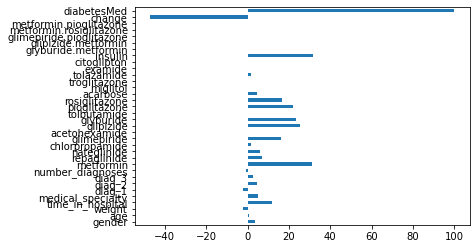

In [23]:
corr_percentage = (correlation*100)
corr_percentage.plot(kind="barh")

In [24]:
top_features = corr_percentage.nlargest(20)
top_features

diabetesMed          100.000000
insulin               31.669332
metformin             31.325559
glipizide             25.479456
glyburide             23.553029
pioglitazone          21.955782
rosiglitazone         16.458429
glimepiride           16.267579
time_in_hospital      11.658511
repaglinide            7.072999
nateglinide            6.063206
medical_specialty      5.236112
acarbose               4.749038
diag_2                 4.582735
gender                 3.621254
diag_3                 2.811095
tolazamide             1.675429
chlorpropamide         1.675429
age                    0.616950
number_diagnoses      -0.608453
Name: diabetesMed, dtype: float64

<AxesSubplot:>

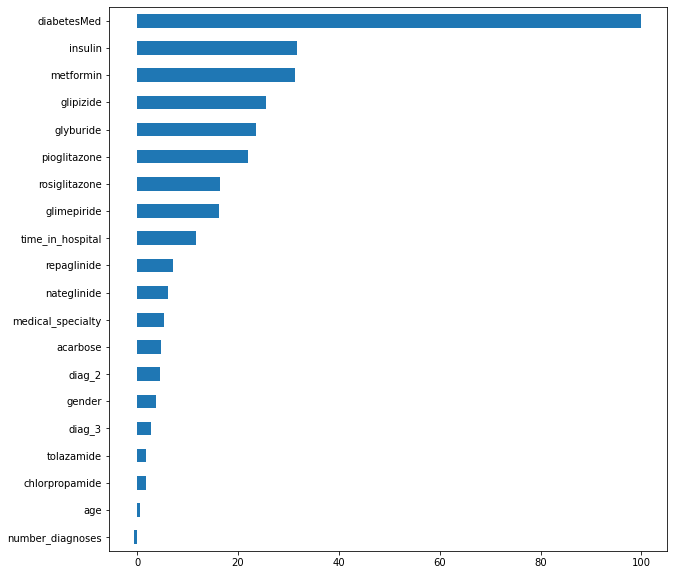

In [25]:
plt.figure(figsize=(10,10))
top_features.sort_values(ascending=True).plot(kind="barh")

In [26]:
final_columns = ["gender","age","medical_specialty","time_in_hospital","diag_2","diag_3","insulin","metformin",
                 "glipizide","glyburide","pioglitazone","rosiglitazone","glimepiride","repaglinide",
                 "nateglinide","acarbose","tolazamide","chlorpropamide","diabetesMed"]
final_df = df[final_columns]

In [27]:
final_df

,gender,age,medical_specialty,time_in_hospital,diag_2,diag_3,insulin,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,glimepiride,repaglinide,nateglinide,acarbose,tolazamide,chlorpropamide,diabetesMed
1102,1,5,0,2,24,73,2,1,1,1,1,1,1,0,0,0,0,0,1
1132,0,6,0,5,219,41,2,2,1,1,1,1,1,0,0,0,0,0,1
1190,0,7,3,11,87,50,2,1,1,1,1,2,1,0,0,0,0,0,1
1204,0,8,0,9,87,30,2,1,1,2,2,1,1,0,0,0,0,0,1
1214,0,5,7,6,46,38,1,1,1,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101238,1,7,3,1,76,92,2,1,1,1,1,1,1,0,0,0,0,0,1
101330,1,3,2,4,166,156,1,1,1,1,1,1,1,0,0,0,0,0,0
101340,1,6,3,3,24,82,1,1,2,1,1,1,1,0,0,0,0,0,1
101449,0,7,3,13,116,38,1,2,1,0,1,1,1,0,0,0,0,0,1


In [28]:
for column in final_df.columns:
    print("-"*30,column,"-"*30)
    print(df[column].unique())

------------------------------ gender ------------------------------
[1 0]
------------------------------ age ------------------------------
[5 6 7 8 4 3 9 1 2 0]
------------------------------ medical_specialty ------------------------------
[0 3 7 2 4 5 6 1]
------------------------------ time_in_hospital ------------------------------
[ 2  5 11  9  6  7  3  1  8 12 10  4 13 14]
------------------------------ diag_2 ------------------------------
[ 24 219  87  46  84  25 143  88  74 123  76 114  41 186 162 137 115  32
 191  80  72  63 144 239 222 197 166 179  75  50  73 116 157 111  34 151
  51  12 163  31 193 109 224  36  44  45 103 149  39 113  19   7  83 223
 238  82 164 119  30  58  98 181 152 204  86  64  79  10 245 121  57  96
 225 135  85 217  70  40 183 208 112  78 196  47  17 194  77 229 129 154
  92  15 218  26 192  37  89 176  93 171  97 132 246 146 190 178  52 101
 136 187  35 167 172 243 131 180 189 234 139  68   4  21 220  11 140 228
 165 233 198  55  13 108 117  48 141

<AxesSubplot:>

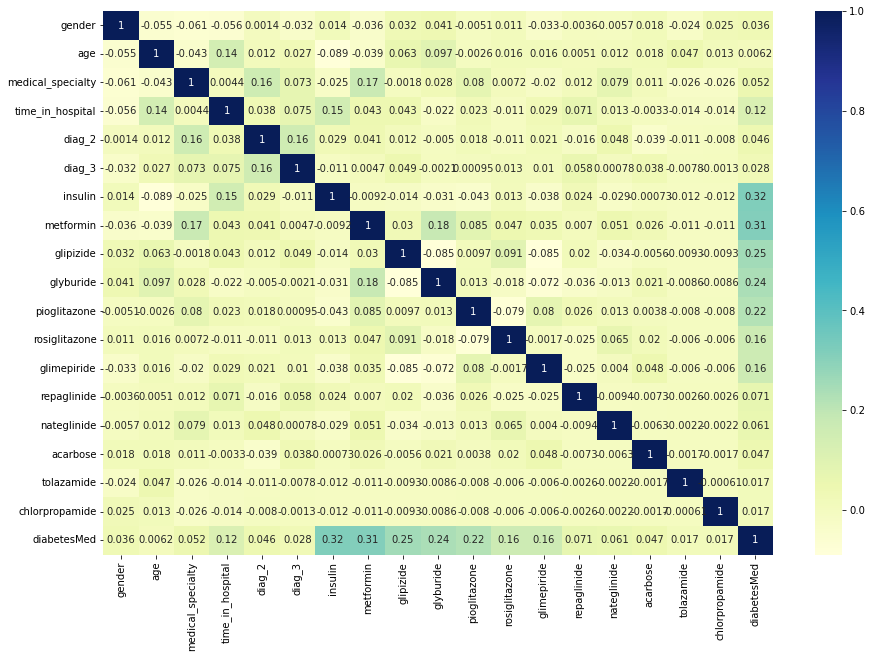

In [29]:
import seaborn as sns
final_corelation = final_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(final_corelation, annot=True, cmap = "YlGnBu" )

In [30]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [31]:
X

,gender,age,medical_specialty,time_in_hospital,diag_2,diag_3,insulin,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,glimepiride,repaglinide,nateglinide,acarbose,tolazamide,chlorpropamide
1102,1,5,0,2,24,73,2,1,1,1,1,1,1,0,0,0,0,0
1132,0,6,0,5,219,41,2,2,1,1,1,1,1,0,0,0,0,0
1190,0,7,3,11,87,50,2,1,1,1,1,2,1,0,0,0,0,0
1204,0,8,0,9,87,30,2,1,1,2,2,1,1,0,0,0,0,0
1214,0,5,7,6,46,38,1,1,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101238,1,7,3,1,76,92,2,1,1,1,1,1,1,0,0,0,0,0
101330,1,3,2,4,166,156,1,1,1,1,1,1,1,0,0,0,0,0
101340,1,6,3,3,24,82,1,1,2,1,1,1,1,0,0,0,0,0
101449,0,7,3,13,116,38,1,2,1,0,1,1,1,0,0,0,0,0


In [32]:
for column in X.columns:
    print("*"*30,column)
    print(X[column].unique())    

****************************** gender
[1 0]
****************************** age
[5 6 7 8 4 3 9 1 2 0]
****************************** medical_specialty
[0 3 7 2 4 5 6 1]
****************************** time_in_hospital
[ 2  5 11  9  6  7  3  1  8 12 10  4 13 14]
****************************** diag_2
[ 24 219  87  46  84  25 143  88  74 123  76 114  41 186 162 137 115  32
 191  80  72  63 144 239 222 197 166 179  75  50  73 116 157 111  34 151
  51  12 163  31 193 109 224  36  44  45 103 149  39 113  19   7  83 223
 238  82 164 119  30  58  98 181 152 204  86  64  79  10 245 121  57  96
 225 135  85 217  70  40 183 208 112  78 196  47  17 194  77 229 129 154
  92  15 218  26 192  37  89 176  93 171  97 132 246 146 190 178  52 101
 136 187  35 167 172 243 131 180 189 234 139  68   4  21 220  11 140 228
 165 233 198  55  13 108 117  48 141 142 147  14 202 188 177 175 235 156
 150 133 138 153   0  94 124 110 127 134 174 107  59  16 209  67 118  38
 130   1 126  65 155  54 206 227 216 120  71 

In [33]:
X.dtypes

gender               int32
age                  int32
medical_specialty    int32
time_in_hospital     int64
diag_2               int32
diag_3               int32
insulin              int32
metformin            int32
glipizide            int32
glyburide            int32
pioglitazone         int32
rosiglitazone        int32
glimepiride          int32
repaglinide          int32
nateglinide          int32
acarbose             int32
tolazamide           int32
chlorpropamide       int32
dtype: object

In [34]:
X.astype(int)

,gender,age,medical_specialty,time_in_hospital,diag_2,diag_3,insulin,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,glimepiride,repaglinide,nateglinide,acarbose,tolazamide,chlorpropamide
1102,1,5,0,2,24,73,2,1,1,1,1,1,1,0,0,0,0,0
1132,0,6,0,5,219,41,2,2,1,1,1,1,1,0,0,0,0,0
1190,0,7,3,11,87,50,2,1,1,1,1,2,1,0,0,0,0,0
1204,0,8,0,9,87,30,2,1,1,2,2,1,1,0,0,0,0,0
1214,0,5,7,6,46,38,1,1,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101238,1,7,3,1,76,92,2,1,1,1,1,1,1,0,0,0,0,0
101330,1,3,2,4,166,156,1,1,1,1,1,1,1,0,0,0,0,0
101340,1,6,3,3,24,82,1,1,2,1,1,1,1,0,0,0,0,0
101449,0,7,3,13,116,38,1,2,1,0,1,1,1,0,0,0,0,0


In [35]:
X.dtypes

gender               int32
age                  int32
medical_specialty    int32
time_in_hospital     int64
diag_2               int32
diag_3               int32
insulin              int32
metformin            int32
glipizide            int32
glyburide            int32
pioglitazone         int32
rosiglitazone        int32
glimepiride          int32
repaglinide          int32
nateglinide          int32
acarbose             int32
tolazamide           int32
chlorpropamide       int32
dtype: object

In [36]:
y

1102      1
1132      1
1190      1
1204      1
1214      0
         ..
101238    1
101330    0
101340    1
101449    1
101456    0
Name: diabetesMed, Length: 1631, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=12)

In [39]:
# feature scalliing 
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_training_score = lr.score(X_train_scaled,y_train)
lr_testing_score = lr.score(X_test_scaled,y_test)
print("Training score :- ",lr_training_score)
print("Testing score :- ",lr_testing_score)

Training score :-  0.9547546012269938
Testing score :-  0.6269113149847095


## Supoort vector machines

In [43]:
from sklearn.svm import SVC

In [44]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
svc_training_score = svc.score(X_train_scaled,y_train)
svc_testing_score = svc.score(X_test_scaled,y_test)
print("Training score :- ",svc_training_score)
print("Testing score :- ",svc_testing_score)

Training score :-  0.9739263803680982
Testing score :-  0.6299694189602446


In [45]:
from sklearn.tree import DecisionTreeClassifier

## Decesion Tree

In [46]:
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
tree_training_score = tree.score(X_train_scaled,y_train)
tree_testing_score = tree.score(X_test_scaled,y_test)
print("Training score :- ",tree_training_score)
print("Testing score :- ",tree_testing_score)

Training score :-  1.0
Testing score :-  0.6574923547400612


## Ensemble method
### Random forest 

In [47]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [48]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
rfc_training_score = rfc.score(X_train_scaled,y_train)
rfc_testing_score = rfc.score(X_test_scaled,y_test)
print("Training score :- ",rfc_training_score)
print("Testing score :- ",rfc_testing_score)

Training score :-  1.0
Testing score :-  0.6574923547400612


## Adaboost classifier

In [49]:
abc = AdaBoostClassifier()
abc.fit(X_train_scaled, y_train)
abc_training_score = abc.score(X_train_scaled,y_train)
abc_testing_score = abc.score(X_test_scaled,y_test)
print("Training score :- ",abc_training_score)
print("Testing score :- ",abc_testing_score)

Training score :-  1.0
Testing score :-  0.6574923547400612


## Hyper parameter tunning for SVC model

In [50]:
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score

In [51]:
c_list = [np.linspace(1.0,10,50)]
c_list[0]

array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
        1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.65306122,
        2.83673469,  3.02040816,  3.20408163,  3.3877551 ,  3.57142857,
        3.75510204,  3.93877551,  4.12244898,  4.30612245,  4.48979592,
        4.67346939,  4.85714286,  5.04081633,  5.2244898 ,  5.40816327,
        5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
        6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
        7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
        8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
        9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ])

In [52]:
param_grid = {
    "C":c_list[0],
    "kernel":["linear","poly","rbf","sigmoid"],
}

estimator = SVC(gamma='scale')

In [53]:
cv = KFold(n_splits=10,shuffle=True,random_state=10)
cross_validation_score_svc = cross_val_score(estimator,X_train_scaled,y_train,scoring="accuracy",cv=cv,verbose=1)
cross_validation_score_svc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


array([0.96946565, 0.96183206, 0.96183206, 0.97709924, 0.95384615,
       0.97692308, 0.96153846, 0.98461538, 0.95384615, 0.97692308])

In [54]:
cross_validation_score_svc = cross_validation_score_svc.mean()
cross_validation_score_svc

0.9677921315325897

In [55]:
svc_model = RandomizedSearchCV(estimator,param_grid,scoring="accuracy",cv=cv,verbose=1)
svc_model.fit(X_train_scaled,y_train)
svc_model_training_score = svc_model.score(X_train_scaled,y_train) 
svc_model_testing_score = svc_model.score(X_test_scaled,y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [56]:
print("Training score :- ",svc_model_training_score)
print("Testing score :- ",svc_model_training_score)

Training score :-  0.9930981595092024
Testing score :-  0.9930981595092024


In [57]:
svc_model.best_params_

{'kernel': 'rbf', 'C': 6.6938775510204085}

## Cross valuation score of tuned svc model

In [58]:
final_estimator = SVC(C=5.59183,kernel="rbf",gamma="scale")
final_estimator_score = cross_val_score(final_estimator,X_train_scaled,y_train,scoring="accuracy",cv=cv)
final_estimator_score

array([0.98473282, 0.97709924, 0.98473282, 0.97709924, 0.99230769,
       0.99230769, 0.99230769, 1.        , 0.96923077, 1.        ])

In [59]:
final_estimator_score.mean()

0.9869817968291251

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix

In [61]:
svc_final_model = SVC(C=5.59183,kernel="rbf",gamma="scale")
svc_final_model.fit(X_train_scaled,y_train)
y_predictions = svc_final_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_predictions)
accuracy

0.6422018348623854

In [62]:
confusion_matrix(y_test,y_predictions)

array([[  0, 111],
       [  6, 210]], dtype=int64)

In [63]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       111
           1       0.65      0.97      0.78       216

    accuracy                           0.64       327
   macro avg       0.33      0.49      0.39       327
weighted avg       0.43      0.64      0.52       327



C:\Users\Sagar Guttal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


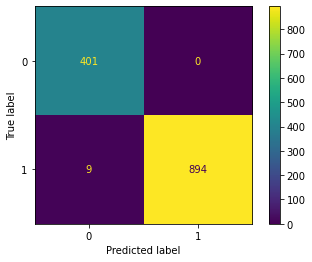

In [64]:
print(plot_confusion_matrix(svc_final_model,X_train_scaled,y_train))

In [65]:
import pickle

In [66]:
##save the model
import pickle
file = open("diabetic_classifier.pkl","wb")

#dump the model
pickle.dump(svc_final_model, file)